In [23]:
%reload_ext autoreload
%autoreload 2
import h5py as h5
import aftpy as aft
import matplotlib.pyplot as plt
from astropy.time import Time 
file1 = "/Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2020/01/AFTmap_20200101_0000.h5"
file2 = "/Users/bjha/Downloads/AFTmap_20100502_0000.h5"

# aftmap1 = aft.aftmap.AFTmap(file1)
# aftmap2 = aft.getaftdata.AFTmap(file2)

# aftdata = aft.aftmap.AFTload(path="/Users/bjha/Data/AFT/AFTfarmaps/v2_300_10/2021")
# aftmap1.info

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [10]:
aftdata.convert_all(outpath="/Users/bjha/Data/AFT/test_fits")

In [9]:
hipft=aft.AFTmap("/Users/bjha/Data/oft/OFTmaps/hipft_brmap_idx000001.h5",
                 filetype="hipft", timestamp="2024-01-01T00:00:00")

In [7]:
import datetime as dt
hipft_prop ={"T0":dt.datetime(2022,1,1), "dt":1}
hipdata = aft.AFTload(path="/Users/bjha/Data/oft/OFTmaps/",
                 filetype="hipft", hipft_prop=hipft_prop)

RootDir   : /Users/bjha/Data/oft/OFTmaps/ 
FileType  : hipft                         
# Files   : 366                           
T-Initial : 2022-01-01 00:00:00           
T-End     : 2023-01-01 00:00:00           


In [11]:
hipft.ymd

('2024', '01', '01')

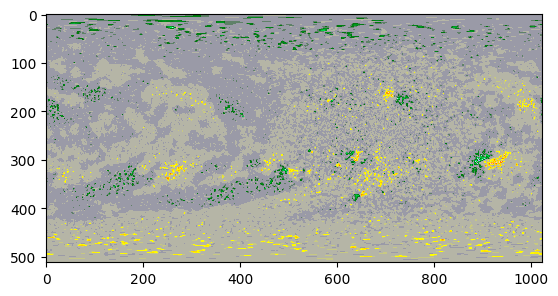

In [10]:
import matplotlib.pyplot as plt
import sunpy.visualization.colormaps
plt.imshow(bmap, vmax=1000, vmin=-1000, cmap="hmimag")

In [9]:
daft = aftget.AFTdownload()
url = daft.get_list(t0=dt.datetime(2014, 1,1), t1=dt.datetime(2015, 1,1), dt=4)
daft.download(url,rootpath="/Users/bjha/Data/test/")

100%|██████████| 365/365 [01:18<00:00,  4.67it/s]


In [71]:
t0

datetime.date(2024, 2, 9)

In [2]:
a=AFTdownload()
b=a.get_list(t0=dt.datetime(2013, 1,1), t1=dt.datetime(2014, 1,1), dt=4)

In [3]:
a.download(b, rootpath="/Users/bjha/Data/test/")
# urlretrieve(b.urls.values[0], os.path.basename(b.urls.values[0]))

100%|██████████| 365/365 [01:27<00:00,  4.15it/s]


In [54]:
pd.read_csv("data/list_of_files.csv", index_col="times").index

Index(['2010-05-01T06:00:00', '2010-05-01T12:00:00', '2010-05-01T18:00:00',
       '2010-05-02T00:00:00', '2010-05-02T06:00:00', '2010-05-02T12:00:00',
       '2010-05-02T18:00:00', '2010-05-03T00:00:00', '2010-05-03T06:00:00',
       '2010-05-03T12:00:00',
       ...
       '2023-12-30T12:00:00', '2023-12-30T18:00:00', '2023-12-31T00:00:00',
       '2023-12-31T06:00:00', '2023-12-31T12:00:00', '2023-12-31T18:00:00',
       '2024-01-01T00:00:00', '2024-01-01T06:00:00', '2024-01-01T12:00:00',
       '2024-01-01T18:00:00'],
      dtype='object', name='times', length=19975)

In [96]:
os.path.basename(b.urls.iloc[0])

'AFTmap_20120101_0000.h5'

In [98]:
np.full(10, "data")

array(['data', 'data', 'data', 'data', 'data', 'data', 'data', 'data',
       'data', 'data'], dtype='<U4')